In [ ]:
import evaluation

executable = evaluation.ROOT_DIR + "/openmp/bin/multilayer-game-of-life"

grid_size = 512
num_layers = 5
num_steps = 128

params = [str(grid_size), str(num_layers), str(num_steps)]

threads2exec_time = {}
rangelist = [1] + list(range(2,17,2))

for num_threads in rangelist:
    environment = {"OMP_NUM_THREADS": str(num_threads)}
    threads2exec_time[num_threads] = evaluation.mean_execution_time(executable, params, environment, repetitions=5, cwd=evaluation.ROOT_DIR + "/openmp")

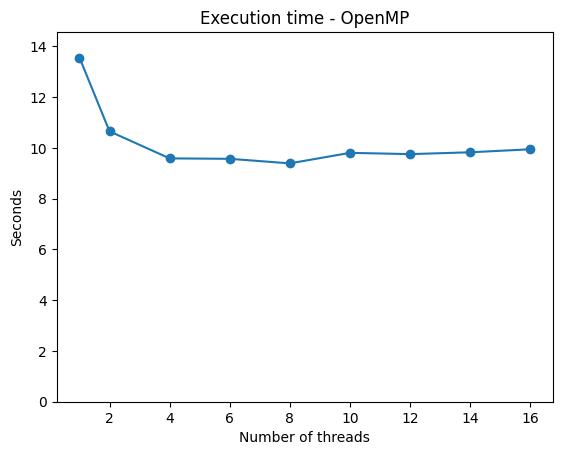

In [14]:
import matplotlib.pyplot as plt

x = list(threads2exec_time.keys())
y = list(threads2exec_time.values())

# Creating the plot
plt.plot(x, y, marker='o')

# Adding title and labels
plt.title('Execution time - OpenMP')
plt.xlabel('Number of threads')
plt.ylabel('Seconds')
plt.ylim(0, max(y)+1)

# Displaying the plot
plt.show()


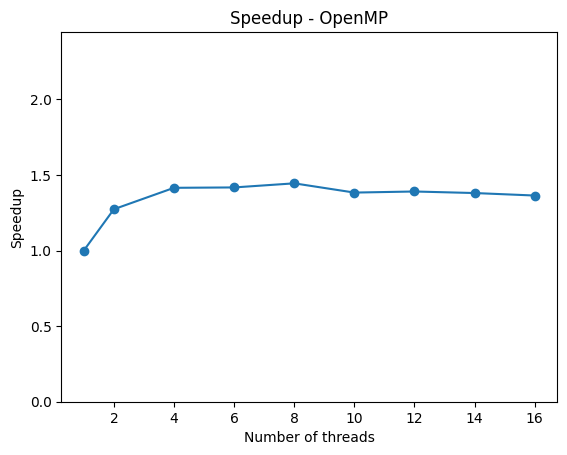

In [15]:
x = list(threads2exec_time.keys())
y = [threads2exec_time[1]/value for value in threads2exec_time.values()]

# Creating the plot
plt.plot(x, y, marker='o')

# Adding title and labels
plt.title('Speedup - OpenMP')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')
plt.ylim(0, max(y)+1)

# Displaying the plot
plt.show()

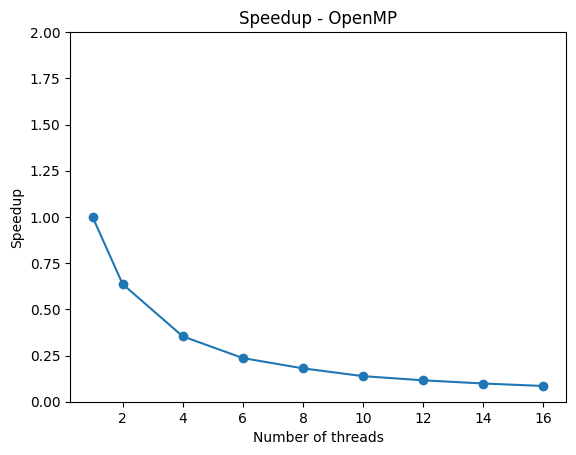

In [16]:
x = list(threads2exec_time.keys())
y = [threads2exec_time[1]/(p*value) for p, value in threads2exec_time.items()]

# Creating the plot
plt.plot(x, y, marker='o')

# Adding title and labels
plt.title('Strong Scaling Efficiency - OpenMP')
plt.xlabel('Number of threads')
plt.ylabel('Strong Scaling')
plt.ylim(0, max(y)+1)

# Displaying the plot
plt.show()